In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

Saving Chapter5_TOC_Prediction_DataSet.xlsx to Chapter5_TOC_Prediction_DataSet.xlsx


{'Chapter5_TOC_Prediction_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [5]:
df=pd.read_excel('Chapter5_TOC_Prediction_DataSet.xlsx')
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [7]:
from sklearn.model_selection import train_test_split
x=df.drop(['TOC_Fraction'], axis='columns')
y=df['TOC_Fraction']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=1000)

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor(n_estimators=5000, criterion='mse', min_samples_split=4,min_samples_leaf=2, bootstrap=False,n_jobs=-1)
et.fit(x_train, y_train)
ypredtrain=et.predict(x_train)
ypredtest=et.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [11]:
from sklearn.metrics import r2_score
print(f'test: {r2_score(y_test, ypredtest)}, train: {r2_score(y_train, ypredtrain)}' )

#the ET gave a better result that RF (random forest)(see my previous code for Random Forest)

test: 0.852598250524107, train: 0.9782879507263095


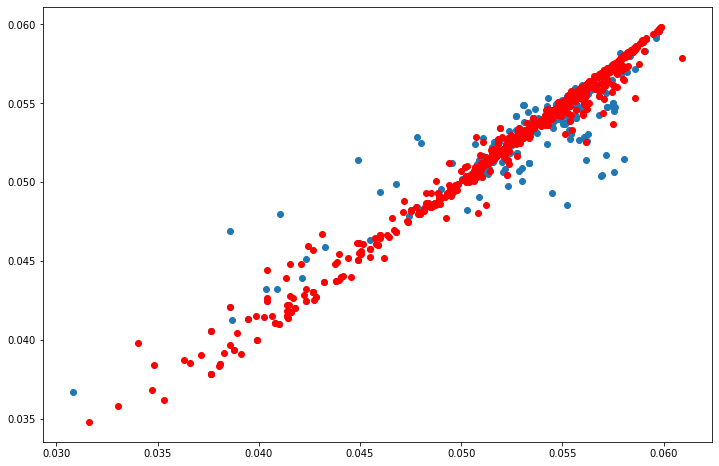

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, ypredtest)
plt.scatter(y_train, ypredtrain, color='red')

In [19]:
df1=df.columns[:-1]
fim=et.feature_importances_
series=pd.Series(fim, index=df1)
series

Thickness_ft                   0.231196
Bulk Density_gg per cc         0.167071
Resistivity_ohmsm              0.104984
Effective Porosity_Fraction    0.209476
Clay Volume_ Fraction          0.195109
Water Saturation_Fraction      0.092165
dtype: float64

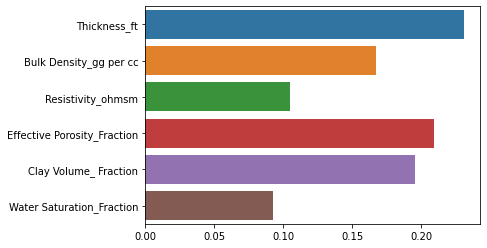

In [20]:
sns.barplot(x=series, y=series.index)

In [21]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(et, x, y, cv=5, scoring='r2')
cvs

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

array([0.78970516, 0.82627103, 0.78324932, 0.84934444, 0.80686984])

In [23]:
round(cvs.mean(), 2)*100

81.0

In [24]:
from sklearn.model_selection import cross_val_predict
cv=cross_val_predict(et, x, y, cv=5)
cv
#The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

array([0.05784138, 0.05142719, 0.0549296 , 0.05754247, 0.0521683 ,
       0.05763899, 0.05279513, 0.0521683 , 0.05571623, 0.056946  ,
       0.05036375, 0.05201259, 0.05201259, 0.05180229, 0.04605338,
       0.05636615, 0.0540037 , 0.05517266, 0.04835684, 0.04656687,
       0.05239663, 0.05677969, 0.05318814, 0.05620899, 0.05555222,
       0.05595292, 0.05592586, 0.050711  , 0.05308084, 0.05178616,
       0.05173018, 0.054727  , 0.05345572, 0.05231088, 0.05243839,
       0.05899757, 0.05417665, 0.05780005, 0.05544462, 0.04701417,
       0.05580818, 0.05185773, 0.05126645, 0.0541738 , 0.05421953,
       0.05554382, 0.05352953, 0.0551221 , 0.04643348, 0.03993012,
       0.05688928, 0.05420104, 0.04643348, 0.04880683, 0.05670215,
       0.05688928, 0.05636615, 0.0567383 , 0.05139135, 0.05555724,
       0.04358951, 0.05478895, 0.05625696, 0.05360333, 0.04554575,
       0.05588412, 0.0593352 , 0.04627489, 0.0545022 , 0.05347699,
       0.0548556 , 0.05094874, 0.05746342, 0.05123883, 0.05261